### Importowanie bibliotek

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history

### Definicja funkcji do obliczania stopów metali

In [4]:
def endurance(params):
    x, y, z, u, v, w = params
    return -(math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w))

### Funkcja "f" do wywołania "endurance"

In [5]:
def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

### Parametry dla algorytmu

In [6]:
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)
options = {"c1": 0.3, "c2": 0.5, "w": 0.9}

### Instancja algorytmu

In [7]:
optimizer = ps.single.GlobalBestPSO(
    n_particles=10, 
    dimensions=6, 
    options=options, 
    bounds=my_bounds
)

### Uruchomienie algorytmu

In [8]:
cost, pos = optimizer.optimize(f, iters=1000)

2023-03-22 12:26:09,629 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.3, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.81
2023-03-22 12:26:11,276 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.806393804938142, best pos: [0.95480126 0.73466435 0.99416956 0.97135668 0.14916065 0.50555294]


### Wykres

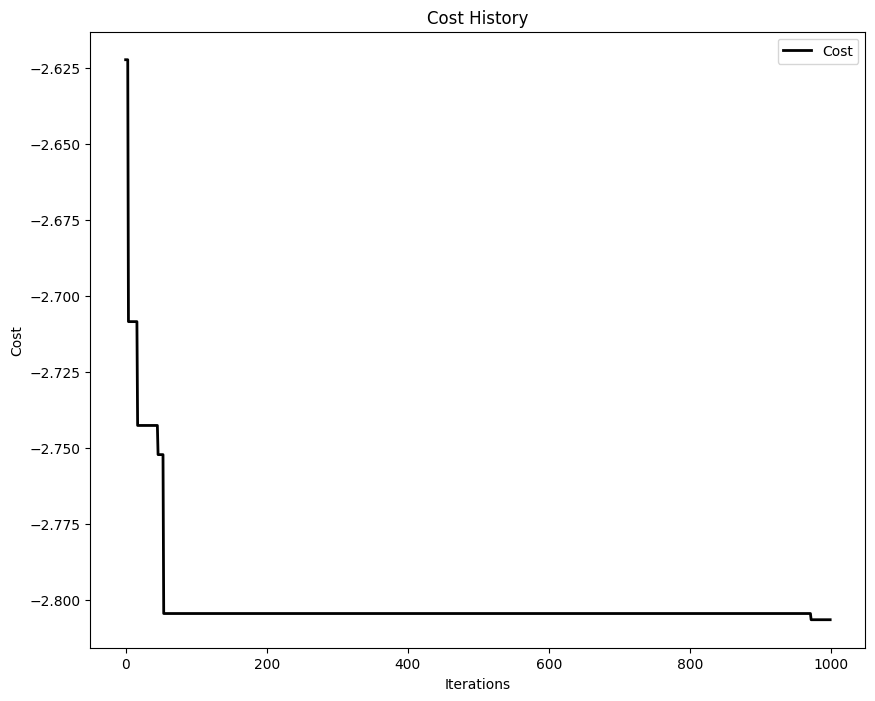

In [9]:
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()